<a href="https://colab.research.google.com/github/sumukhbhat12/Tensor-Flow-Course-FreeCodeCamp/blob/main/Working_With_Small_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Augmentation

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
train_images.shape

(50000, 32, 32, 3)

In [5]:
# from keras.preprocessing import image
import keras.utils as image
from keras.preprocessing.image import ImageDataGenerator

ImageDataGenerator is deprecated

creates a data generator object that transforms images

In [6]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

transforming the image

In [7]:
test_img = train_images[1]
img = image.img_to_array(test_img)
img = img.reshape((1,) + img.shape)

In [8]:
img.shape

(1, 32, 32, 3)

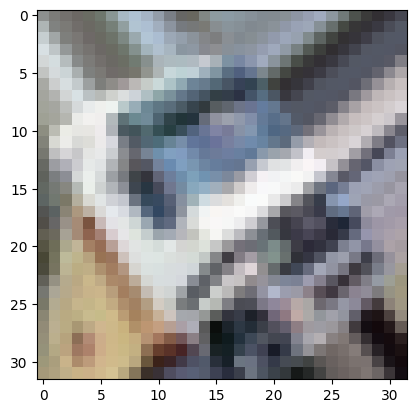

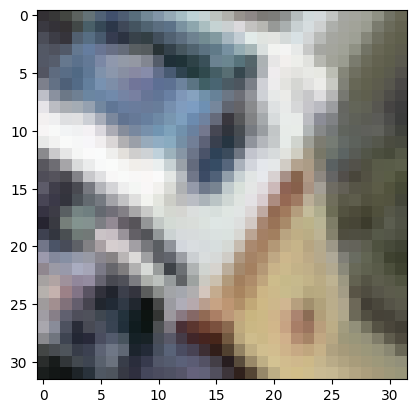

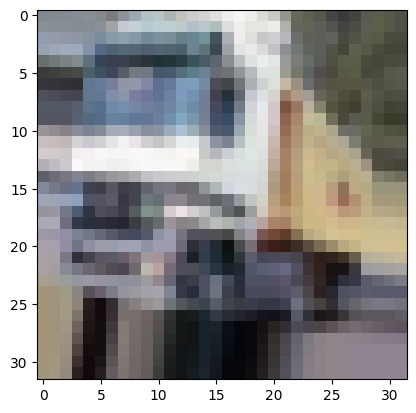

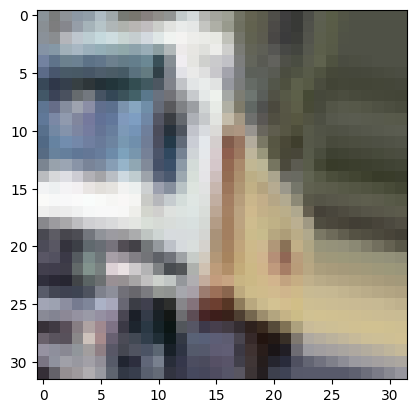

In [10]:
i = 0
batches = datagen.flow(img, save_prefix='test', save_format='jpeg')

for batch in batches:
  plt.figure(i)
  plot = plt.imshow(image.img_to_array(batch[0]))
  i += 1
  if i >= 4:
    break   #show 4 images

plt.show()

Using preprocessing layers instead

In [23]:
rotation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.4)
])

Original Image

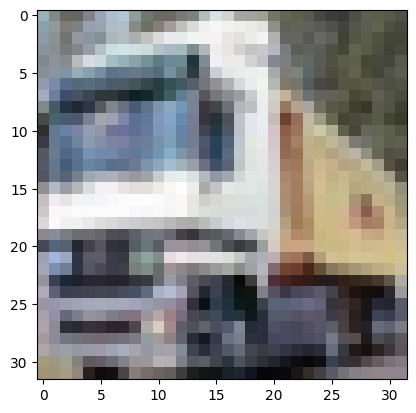

In [13]:
plt.imshow(img[0])

after rotating clockwise or counter clockwise

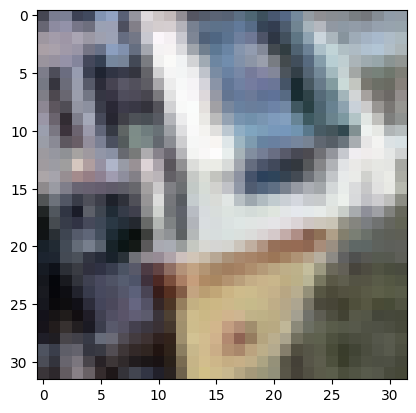

In [25]:
result = rotation(img[0])
plt.imshow(result)

In [36]:
translation = tf.keras.Sequential([
    tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2, fill_mode='nearest')
])

after translating left or right

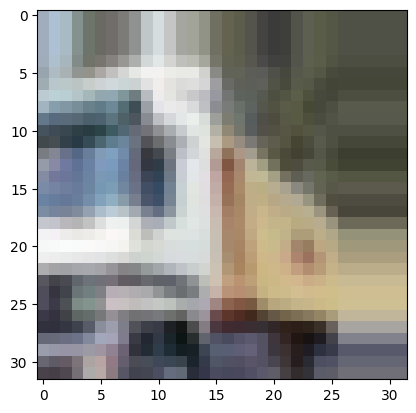

In [40]:
result = translation(img[0])
plt.imshow(result)

In [43]:
zoom = tf.keras.Sequential([
    tf.keras.layers.RandomZoom(0.2, fill_mode='nearest')
])

after zooming in or out

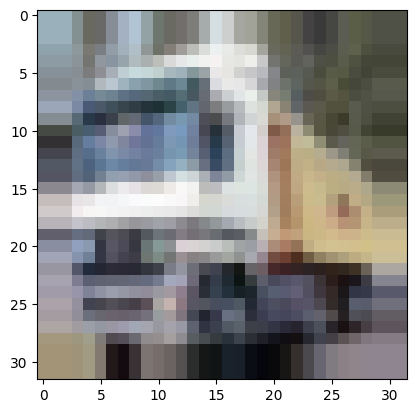

In [45]:
result = zoom(img[0])
plt.imshow(result)

In [46]:
flip = tf.keras.Sequential([
    tf.keras.layers.RandomFlip(mode="horizontal")
])

after randomly flipping the image in horizontal axis

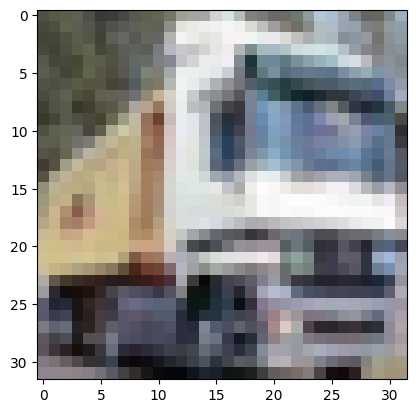

In [49]:
result = flip(img[0])
plt.imshow(result)